In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_excel("C:/Users/agamb/Desktop/premium preidction/dataset/premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns.str.replace(' ','_').str.lower()
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [5]:
df.isnull().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [8]:
df.isnull().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [11]:
# use bracket notation for column names that contain spaces
df[df['Number Of Dependants'] < 0]['Number Of Dependants'].unique()

array([-3, -1])

In [12]:
df['Number Of Dependants'] = abs(df['Number Of Dependants'])
df['Number Of Dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Number Of Dependants, dtype: float64

## Numeric Columns

In [13]:
numeric_cols = df.select_dtypes(['float64','int64']).columns
numeric_cols

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

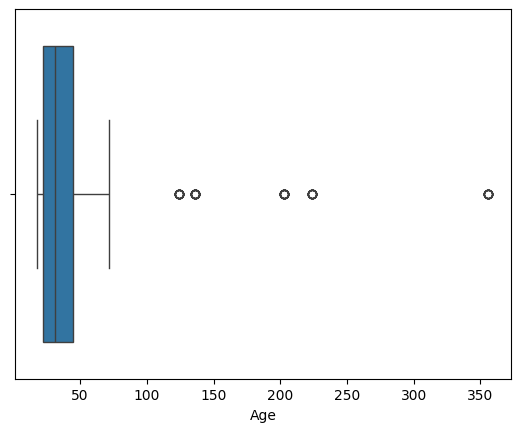

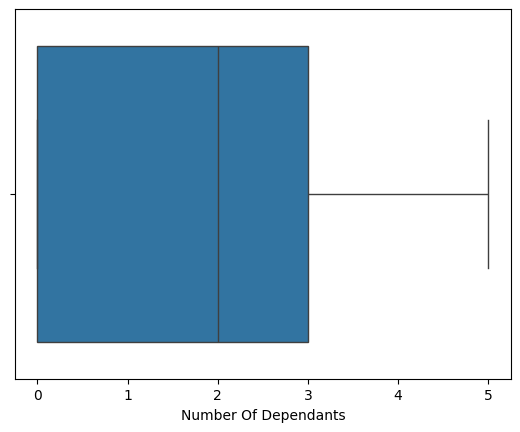

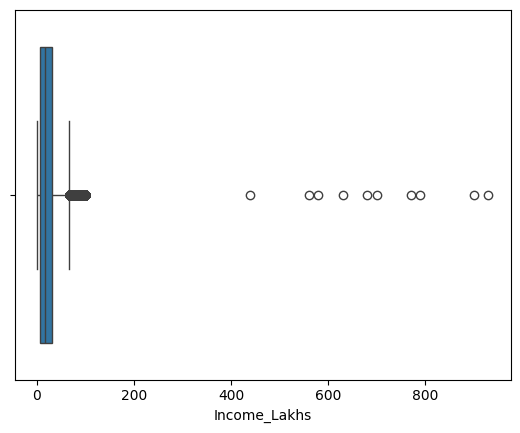

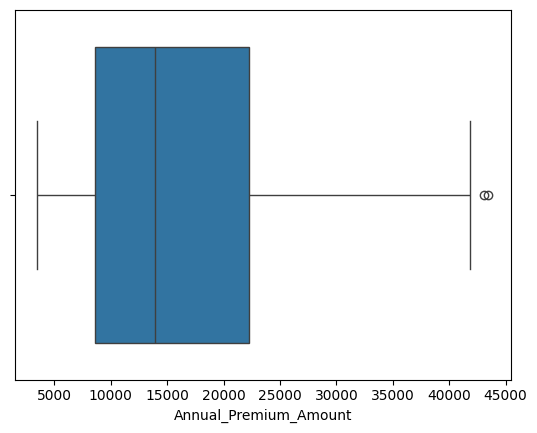

In [14]:
for col in numeric_cols:
  sns.boxplot(x=df[col])
  plt.show()

In [15]:
df[df.Age>100]['Age'].unique()

array([224, 124, 136, 203, 356])

In [16]:
df1 = df[df.Age<=100].copy()
df1.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


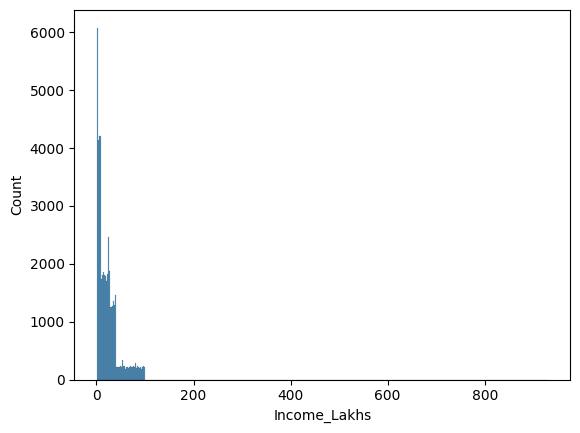

In [17]:
sns.histplot(df1.Income_Lakhs)
plt.show()

In [18]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR
  return upper_bound, lower_bound

In [19]:
get_iqr_bounds(df1.Income_Lakhs)

(43.0, -29.0)

In [20]:
quantile_threshold = df1.Income_Lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [22]:
df2 = df1[df1.Income_Lakhs<=quantile_threshold].copy()
df2.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


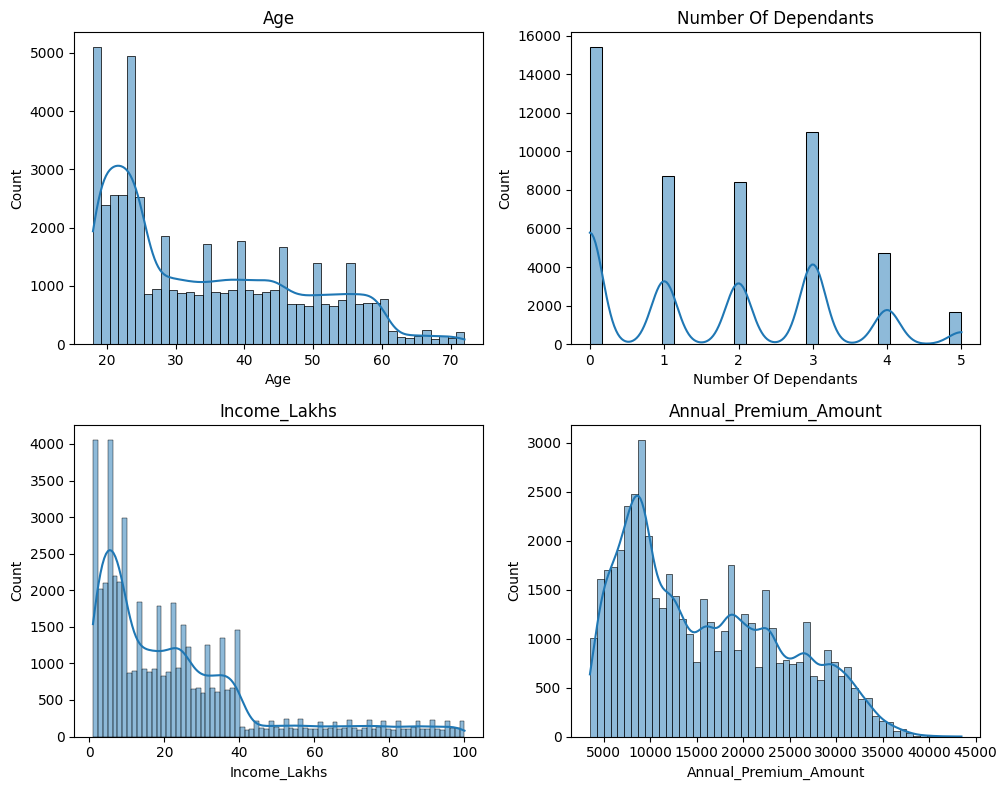

In [32]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
for i, column in enumerate(numeric_cols):
  ax = axs[i//2, i%2]
  sns.histplot(df2[column], kde=True,ax=ax)
  ax.set_title(column)
  
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Annual_Premium_Amount'>

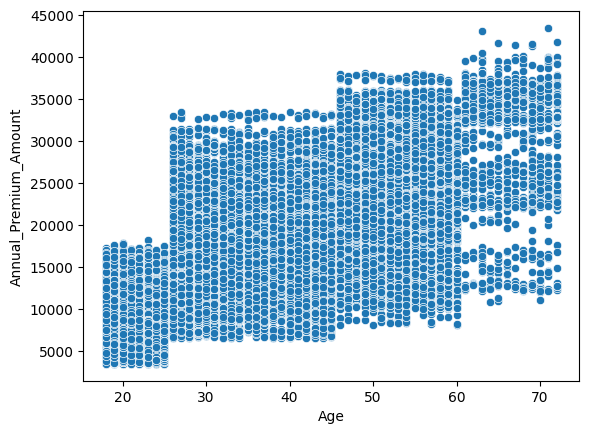

In [34]:
sns.scatterplot(df2, x='Age',y='Annual_Premium_Amount')

In [41]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

## Working on categorical columns now

In [42]:
for col in categorical_cols:
  print(col, ";", df2[col].unique())

Gender ; ['Male' 'Female']
Region ; ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Marital_status ; ['Unmarried' 'Married']
BMI_Category ; ['Normal' 'Obesity' 'Overweight' 'Underweight']
Smoking_Status ; ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Employment_Status ; ['Salaried' 'Self-Employed' 'Freelancer']
Income_Level ; ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Medical History ; ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Insurance_Plan ; ['Bronze' 'Silver' 'Gold']
